In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from stress_addition_model import sam_prediction, SAM_Setting
from data_formats import read_data, ExperimentData, DoseResponseSeries
from dose_reponse_fit import ModelPredictions
from scipy.stats import beta

In [2]:
df = pd.read_csv("was_ist_das_problem.csv", index_col = 0)
mses = df.query("`metric` == 'mse'").copy()
mses.iloc[:,-4:] = mses.iloc[:,-4:].astype("float")
mses.iloc[:,-4:].mean()

new                 0.91203
old                0.927709
marco_ohne_div     0.525272
marco_ohne_temp    0.499156
dtype: object

In [10]:
diffs = df.query("`metric` == 'diff'").copy()

def to_list(s):
    return list(map(float, s[1:-1].replace("  ", " ").split(" ")))

for col in df.columns[-4:]:
    diffs[col] = diffs[col].apply(eval).apply(lambda x: np.array([float(a) for a in x]))

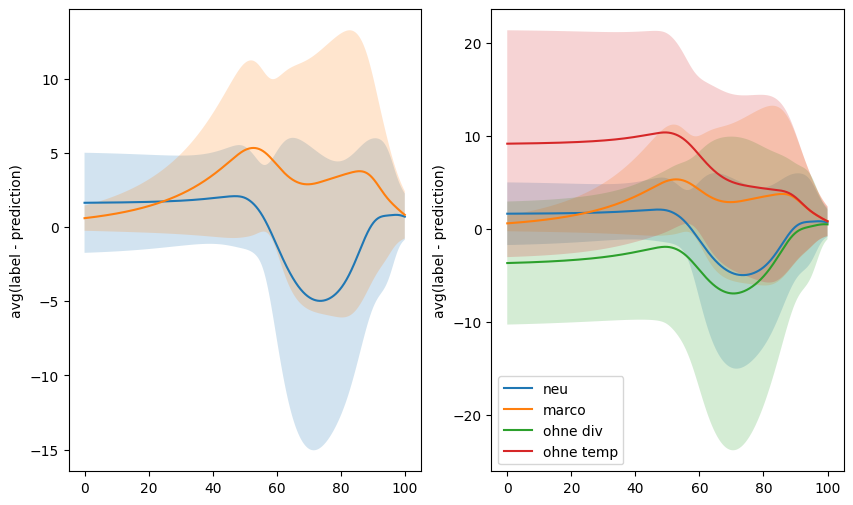

In [13]:
vals = {"neu":"new", "marco":"old", "ohne div" : "marco_ohne_div", "ohne temp": "marco_ohne_temp"}

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

x = np.linspace(0,100, num=10000)

for name, col in vals.items():
    if name not in ["neu", "marco"]:
        continue
    mean = diffs[col].values.mean(axis=0)
    std = diffs[col].values.std(axis=0)
    plt.plot(x, mean, label= name)
    plt.fill_between(x, mean - std, mean + std, alpha=0.2)
plt.ylabel("avg(label - prediction)")


plt.subplot(1,2,2)

for name, col in vals.items():
    
    mean = diffs[col].values.mean(axis=0)
    std = diffs[col].values.std(axis=0)
    plt.plot(x, mean, label= name)
    plt.fill_between(x, mean - std, mean + std, alpha=0.2)



plt.ylabel("avg(label - prediction)")

plt.legend()
plt.show()

In [107]:
mses["d"] = mses.new - mses.old
neu_besser = mses.sort_values("d", ascending=False).iloc[:4].stressor.values

import shutil

for p in neu_besser:
    shutil.copy2("migration/variations_diff/"+ p, "migration/new_better/"+ p.replace(".png","_diff.png"))
    shutil.copy2("sam_plots/"+ p, "migration/new_better/"+ p)
    
    
old_besser = mses.sort_values("d", ascending=True).iloc[:4].stressor.values


for p in old_besser:
    shutil.copy2("migration/variations_diff/"+ p, "migration/old_better/"+ p.replace(".png","_diff.png"))
    shutil.copy2("sam_plots/"+ p, "migration/old_better/"+ p)
    